In [1]:
from tqdm.auto import tqdm
import os
import undetected_chromedriver as uc
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains
import time
import pandas as pd
pd.set_option("display.max_colwidth", None)

In [2]:
driver = uc.Chrome(headless=False, use_subprocess=False)
driver.implicitly_wait(10)
driver.set_page_load_timeout(15)

In [3]:
driver.get("https://www.google.com/")

In [4]:
search_field = driver.find_element(By.TAG_NAME, "textarea")
search_field.clear()
search_field.send_keys("#parenting #timeout")
search_field.submit()

In [5]:
driver.find_element(By.LINK_TEXT, "Short videos").click()

In [ ]:
for i in range(10):
    ActionChains(driver).scroll_by_amount(0, 10000).perform()
    time.sleep(1)

In [9]:
while True:
  try:
    driver.find_element(By.LINK_TEXT, "More results").click()
    print(len(driver.find_elements(By.CSS_SELECTOR, "div.MjjYud")))
    time.sleep(1)
  except Exception as e:
    print(e)
    break

252
264
276
288
300
312
324
336
Message: element not interactable: element has zero size
  (Session info: chrome=141.0.7390.76); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#elementnotinteractableexception
Stacktrace:
#0 0x6438914394ca <unknown>
#1 0x643890eb8566 <unknown>
#2 0x643890f0b6fb <unknown>
#3 0x643890efe98b <unknown>
#4 0x643890f30632 <unknown>
#5 0x643890efe307 <unknown>
#6 0x643890f307fe <unknown>
#7 0x643890f56328 <unknown>
#8 0x643890f30403 <unknown>
#9 0x643890efcb02 <unknown>
#10 0x643890efd7c1 <unknown>
#11 0x6438913fd298 <unknown>
#12 0x6438914010ff <unknown>
#13 0x6438913e4729 <unknown>
#14 0x643891401ca5 <unknown>
#15 0x6438913c9f8f <unknown>
#16 0x643891426308 <unknown>
#17 0x6438914264e3 <unknown>
#18 0x643891438463 <unknown>
#19 0x7ede3869caa4 <unknown>
#20 0x7ede38729c6c <unknown>



In [10]:
results = driver.find_elements(By.CSS_SELECTOR, "div.MjjYud")
len(results)

344

In [11]:
parsed_results = []
for result in tqdm(results):
  link = result.find_elements(By.TAG_NAME, "a")[0].get_attribute("href")
  bits = result.text.split("\n")
  duration = bits[0]
  title = bits[1]
  bits = bits[2].split()
  source = bits[0]
  author = bits[-1]
  parsed_results.append({
    "link": link,
    "duration": duration,
    "title": title,
    "source": source,
    "author": author,
  })
df = pd.DataFrame(parsed_results)
df

  0%|          | 0/344 [00:00<?, ?it/s]

,link,duration,title,source,author
0,https://www.instagram.com/reel/DBjTKzcRj_3/,1:09,Comment 'Help' to learn more about Time-out Training I know ...,Instagram,livjowen
1,https://www.facebook.com/DeborahLTillman/videos/does-timeout-not-work-for-your-child-youre-not-failing-the-method-is-heres-why-t/1113454657546306/,1:00,Does timeout not work for your child? You’re not failing - the ...,Facebook,Tillman
2,https://www.youtube.com/shorts/5j8YOD5BaVQ,1:00,When to Use Time Out vs When Not to #momlife ...,YouTube,Owen
3,https://www.tiktok.com/@bratbustersparenting/video/7307422793077886214,0:33,Effective Parenting: Managing Timeout Strategies,TikTok,bratbustersparenting
4,https://www.instagram.com/reel/DBhoJycP4KG/,1:12,Comment 'Help' to learn more about Time-out Training ♥️ ...,Instagram,livjowen
...,...,...,...,...,...
339,https://www.tiktok.com/@tattooed_ash/video/7519670335684250894,0:14,Managing a Dumpy Personality: A Humorous Take,TikTok,tattooed_ash
340,https://www.tiktok.com/@worldstompers/video/7532889049460215070,0:10,Experiencia mágica en el trekking de gorilas en Rwanda,TikTok,worldstompers
341,https://www.tiktok.com/@worldstompers/video/7531020693836811550,0:05,Emotional Check-Ins: Communicating with Parents,TikTok,worldstompers
342,https://www.tiktok.com/@taylorsshopfinds/video/7523978225324690719,0:07,@The Brim Reapers loving this hat so much! #misbehaving ...,TikTok,taylorsshopfinds


In [12]:
df.source.value_counts()

source
Instagram     135
TikTok        134
YouTube        62
Facebook        6
Lemon8-app      4
Pinterest       2
NewsBreak       1
Name: count, dtype: int64

In [13]:
df[df.duplicated(subset=["duration", "title"], keep=False)]

,link,duration,title,source,author
64,https://www.instagram.com/reel/Co4Iji-gTOZ/?hl=en,0:34,Timeout (naughty corner) is a form of punishment. Yeah ...,Instagram,mamaslearn
227,https://www.tiktok.com/@mamaslearn/video/7202309852528463106,0:34,Timeout (naughty corner) is a form of punishment. Yeah ...,TikTok,mamaslearn


In [14]:
df.to_csv("googlesearch.csv", index=False)

In [15]:
search_field = driver.find_element(By.TAG_NAME, "textarea")
search_field.clear()
search_field.send_keys("#gentleparenting #timeout")
search_field.submit()

In [16]:
for i in range(10):
    ActionChains(driver).scroll_by_amount(0, 10000).perform()
    time.sleep(1)

In [19]:
while True:
  try:
    driver.find_element(By.LINK_TEXT, "More results").click()
    print(len(driver.find_elements(By.CSS_SELECTOR, "div.MjjYud")))
    time.sleep(1.5)
  except Exception as e:
    print(e)
    break

96
108
120
132
143
Message: element not interactable: element has zero size
  (Session info: chrome=141.0.7390.76); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#elementnotinteractableexception
Stacktrace:
#0 0x6438914394ca <unknown>
#1 0x643890eb8566 <unknown>
#2 0x643890f0b6fb <unknown>
#3 0x643890efe98b <unknown>
#4 0x643890f30632 <unknown>
#5 0x643890efe307 <unknown>
#6 0x643890f307fe <unknown>
#7 0x643890f56328 <unknown>
#8 0x643890f30403 <unknown>
#9 0x643890efcb02 <unknown>
#10 0x643890efd7c1 <unknown>
#11 0x6438913fd298 <unknown>
#12 0x6438914010ff <unknown>
#13 0x6438913e4729 <unknown>
#14 0x643891401ca5 <unknown>
#15 0x6438913c9f8f <unknown>
#16 0x643891426308 <unknown>
#17 0x6438914264e3 <unknown>
#18 0x643891438463 <unknown>
#19 0x7ede3869caa4 <unknown>
#20 0x7ede38729c6c <unknown>



In [20]:
results = driver.find_elements(By.CSS_SELECTOR, "div.MjjYud")
len(results)

143

In [21]:
parsed_results = []
for result in tqdm(results):
  link = result.find_elements(By.TAG_NAME, "a")[0].get_attribute("href")
  bits = result.text.split("\n")
  duration = bits[0]
  title = bits[1]
  bits = bits[2].split()
  source = bits[0]
  author = bits[-1]
  parsed_results.append({
    "link": link,
    "duration": duration,
    "title": title,
    "source": source,
    "author": author,
  })
df2 = pd.DataFrame(parsed_results)
df2

  0%|          | 0/143 [00:00<?, ?it/s]

,link,duration,title,source,author
0,https://www.youtube.com/shorts/5j8YOD5BaVQ,1:00,When to Use Time Out vs When Not to #momlife ...,YouTube,Owen
1,https://www.youtube.com/shorts/vrFlAkzWns8,1:00,Breaking Down My Time-Out Process for Toddlers ...,YouTube,Owen
2,https://www.instagram.com/reel/DBjTKzcRj_3/,1:09,Comment 'Help' to learn more about Time-out Training I know ...,Instagram,livjowen
3,https://www.instagram.com/reel/DCHwWHnPu89/?hl=en,1:29,✨ Let’s talk about when (and when not) to use time-outs with ...,Instagram,livjowen
4,https://www.instagram.com/reel/DMW-CDDuQNr/,1:58,Teaching Healthy Boundaries to Kids: What is Time Out Really ...,Instagram,jofrost
...,...,...,...,...,...
138,https://www.tiktok.com/@cynthiajessica117/video/7335046819203779873,0:58,Por fin! Gloria Trevi demandará a Sergio Andrade ...,TikTok,cynthiajessica117
139,https://www.tiktok.com/@fedfreestyle/video/7519461553020669206,1:14,Il calciatore che perse un dito per esultanza,TikTok,fedfreestyle
140,https://www.tiktok.com/@artgrfite2/video/7227962410596945157?lang=en,0:12,desenhos para fazer no caderno #graffiti #Anime #arte ...,TikTok,artgrfite2
141,https://www.tiktok.com/@putiadellostello/video/7395608101220551969,0:25,Il ristorante con grotta lavica a Catania,TikTok,putiadellostello


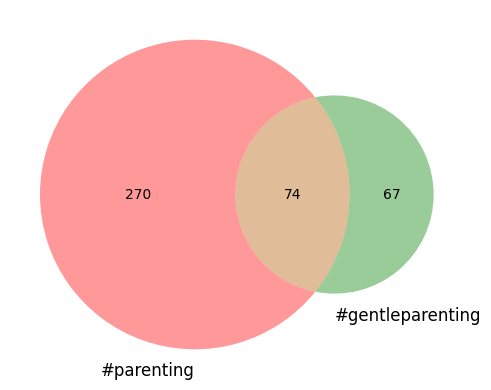

In [22]:
from matplotlib_venn import venn2
venn2([set(df.link), set(df2.link)], set_labels = ('#parenting', '#gentleparenting'))

In [23]:
df = pd.concat([df, df2]).drop_duplicates()
df

,link,duration,title,source,author
0,https://www.instagram.com/reel/DBjTKzcRj_3/,1:09,Comment 'Help' to learn more about Time-out Training I know ...,Instagram,livjowen
1,https://www.facebook.com/DeborahLTillman/videos/does-timeout-not-work-for-your-child-youre-not-failing-the-method-is-heres-why-t/1113454657546306/,1:00,Does timeout not work for your child? You’re not failing - the ...,Facebook,Tillman
2,https://www.youtube.com/shorts/5j8YOD5BaVQ,1:00,When to Use Time Out vs When Not to #momlife ...,YouTube,Owen
3,https://www.tiktok.com/@bratbustersparenting/video/7307422793077886214,0:33,Effective Parenting: Managing Timeout Strategies,TikTok,bratbustersparenting
4,https://www.instagram.com/reel/DBhoJycP4KG/,1:12,Comment 'Help' to learn more about Time-out Training ♥️ ...,Instagram,livjowen
...,...,...,...,...,...
138,https://www.tiktok.com/@cynthiajessica117/video/7335046819203779873,0:58,Por fin! Gloria Trevi demandará a Sergio Andrade ...,TikTok,cynthiajessica117
139,https://www.tiktok.com/@fedfreestyle/video/7519461553020669206,1:14,Il calciatore che perse un dito per esultanza,TikTok,fedfreestyle
140,https://www.tiktok.com/@artgrfite2/video/7227962410596945157?lang=en,0:12,desenhos para fazer no caderno #graffiti #Anime #arte ...,TikTok,artgrfite2
141,https://www.tiktok.com/@putiadellostello/video/7395608101220551969,0:25,Il ristorante con grotta lavica a Catania,TikTok,putiadellostello


In [24]:
df[df.duplicated(subset=["duration", "title"], keep=False)]

,link,duration,title,source,author
58,https://www.instagram.com/reel/C84_zmkvrzb/?hl=en,1:05,"We are ready for timeout training, (thank goodness!) so I set ...",Instagram,livjowen
64,https://www.instagram.com/reel/Co4Iji-gTOZ/?hl=en,0:34,Timeout (naughty corner) is a form of punishment. Yeah ...,Instagram,mamaslearn
227,https://www.tiktok.com/@mamaslearn/video/7202309852528463106,0:34,Timeout (naughty corner) is a form of punishment. Yeah ...,TikTok,mamaslearn
70,https://www.tiktok.com/@livjowen/video/7386742111510564139,1:05,"We are ready for timeout training, (thank goodness!) so I set ...",TikTok,livjowen


In [25]:
df.source.value_counts()

source
TikTok        180
Instagram     152
YouTube        64
Facebook        7
Lemon8-app      5
Pinterest       2
NewsBreak       1
Name: count, dtype: int64

In [26]:
df.to_csv("googlesearch.csv", index=False)